In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


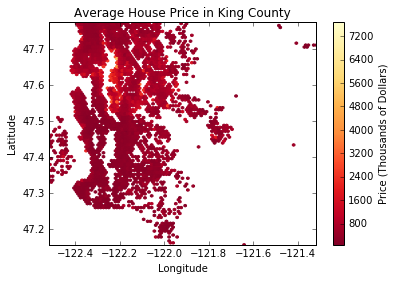

In [5]:
lat = df.iloc[:,17].values
long = df.iloc[:,18].values
prices = df.iloc[:, 2]/1000
xmin = long.min()
xmax = long.max()
ymin = lat.min()
ymax = lat.max()
vmin = prices.min()
vmax = prices.max()

plt.subplots_adjust(hspace=0.5)
plt.hexbin(long, lat, C=prices, vmin=vmin, vmax=vmax, cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Average House Price in King County")
cb = plt.colorbar()
cb.set_label('Price (Thousands of Dollars)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

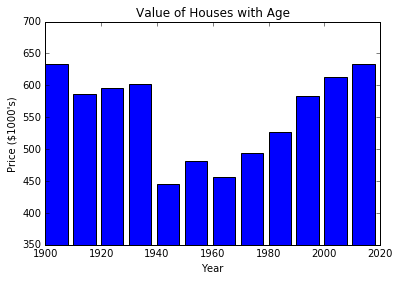

In [39]:
dates = df.iloc[:, (2,14)].values
def decade_avg_price(decade):
    timeslice = dates[(dates[:,1] >= decade) & (dates[:,1] < decade + 10)]
    return timeslice[:,0].mean()

dates[:,1].min() # 1900
dates[:,1].max() # 2015

yearly_prices = np.array([decade_avg_price(x) for x in range(1900, 2020, 10)]) / 1000
years = np.array(range(1900,2020,10))
plt.bar(years, yearly_prices, width=8)
plt.ylim(350, 700)
plt.title('Value of Houses with Age')
plt.xlabel('Year')
plt.ylabel('Price ($1000\'s)')
plt.show()

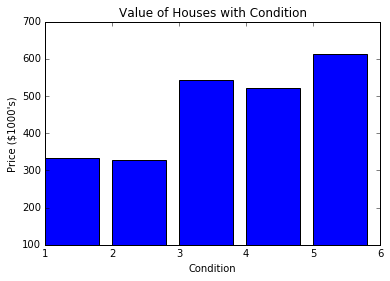

In [47]:
conditions = df.iloc[:,(2,10)].values
conditions[:,1].min(), conditions[:,1].max() # 1, 5
def condition_avg_price(condition):
    sub_arr = conditions[conditions[:,1] == condition]
    return sub_arr[:,0].mean()

prices = np.array([condition_avg_price(x) for x in range(1,6)]) / 1000
x_axis = np.array(range(1,6))
plt.bar(x_axis, prices)
plt.ylim(100, 700)
plt.title('Value of Houses with Condition')
plt.xlabel('Condition')
plt.ylabel('Price ($1000\'s)')
plt.show()